# <span style="color:blue">[</span> Lab 7 Learning rate and Evaluation <span style="color:blue">]</span>
<p>출처: <a href="http://hunkim.github.io/ml/" title="모두를 위한 머신러닝과 딥러닝의 강의" target="blank">모두를 위한 머신러닝과 딥러닝의 강의</a></p> <br/>
> [Tensorflow Document(Tensor Transformations)](https://www.tensorflow.org/api_guides/python/array_ops)  <br/>
> [CS 20SI: Tensorflow for Deep Learning Research](http://web.stanford.edu/class/cs20si/)

In [1]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

print('tensorflow version: {0}'.format(tf.__version__))
# print('numpy version: {0}'.format(np.__version__))

tensorflow version: 1.2.0


# Define paramaters for the model

In [2]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# Step 1: Read in data
> using TF Learn's built in function to load MNIST data to the folder data/mnist <br/>
> Check out [MNIST For ML Beginners](https://www.tensorflow.org/get_started/mnist/beginners) for more information about the mnist dataset

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Step 2: create placeholders for features and labels
> each image in the MNIST data is of shape 28*28 = 784 <br/>
> therefore, each image is represented with a 1x784 tensor <br/>
> there are 10 classes for each image, corresponding to digits 0 - 9.  <br/>
> each lable is one hot vector.

In [4]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# Step 3: create weights and bias
> w is initialized to random variables with normal random distribution   <br/>
> b is initialized to random variables with normal random distribution 

In [5]:
# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

# Step 4: build model
> the model that returns the logits. <br/>
> this logits will be later passed through softmax layer

In [6]:
hypothesis = tf.matmul(X, W) + b

# Step 5: define loss function
> use cross entropy of softmax of logits as the loss function

In [7]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))

# Step 6: define training op
>using gradient descent with learning rate of {learning_rate} to minimize loss

In [8]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initialize session & global variables

In [9]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Train model

In [10]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 5.745170867
Epoch: 0002 cost = 1.780056707
Epoch: 0003 cost = 1.122778636
Epoch: 0004 cost = 0.872012262
Epoch: 0005 cost = 0.738203184
Epoch: 0006 cost = 0.654728885
Epoch: 0007 cost = 0.596023600
Epoch: 0008 cost = 0.552216821
Epoch: 0009 cost = 0.518254966
Epoch: 0010 cost = 0.491113190
Epoch: 0011 cost = 0.468347525
Epoch: 0012 cost = 0.449374339
Epoch: 0013 cost = 0.432675652
Epoch: 0014 cost = 0.418828148
Epoch: 0015 cost = 0.406128921
Learning Finished!


# Test model and check accuracy

Accuracy: 0.9023
Label:  [3]
Prediction:  [3]


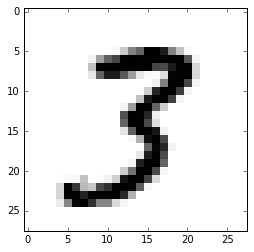

'\nEpoch: 0001 cost = 5.888845987\nEpoch: 0002 cost = 1.860620173\nEpoch: 0003 cost = 1.159035648\nEpoch: 0004 cost = 0.892340870\nEpoch: 0005 cost = 0.751155428\nEpoch: 0006 cost = 0.662484806\nEpoch: 0007 cost = 0.601544010\nEpoch: 0008 cost = 0.556526115\nEpoch: 0009 cost = 0.521186961\nEpoch: 0010 cost = 0.493068354\nEpoch: 0011 cost = 0.469686249\nEpoch: 0012 cost = 0.449967254\nEpoch: 0013 cost = 0.433519321\nEpoch: 0014 cost = 0.419000337\nEpoch: 0015 cost = 0.406490815\nLearning Finished!\nAccuracy: 0.9035\n'

In [11]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

'''
Epoch: 0001 cost = 5.888845987
Epoch: 0002 cost = 1.860620173
Epoch: 0003 cost = 1.159035648
Epoch: 0004 cost = 0.892340870
Epoch: 0005 cost = 0.751155428
Epoch: 0006 cost = 0.662484806
Epoch: 0007 cost = 0.601544010
Epoch: 0008 cost = 0.556526115
Epoch: 0009 cost = 0.521186961
Epoch: 0010 cost = 0.493068354
Epoch: 0011 cost = 0.469686249
Epoch: 0012 cost = 0.449967254
Epoch: 0013 cost = 0.433519321
Epoch: 0014 cost = 0.419000337
Epoch: 0015 cost = 0.406490815
Learning Finished!
Accuracy: 0.9035
'''
